In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy.stats import norm
from ntuple_lib import *
beautify_plots(plt)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
files = ['ntuples_condor/OutDir_{}/hist-Rel21sample.root'.format(i) for i in range(1, 10)]

track_z0 = np.array([], dtype='object')
track_theta = np.array([], dtype='object')
track_qOverP = np.array([], dtype='object')

reco_vertex_track_idxs = np.array([], dtype='object')
truth_vertex_track_idxs = np.array([], dtype='object')

for file in files:
    root_file = uproot.open(file)
    for key in root_file.keys():
        if key.startswith('EventTree'):
            tree = root_file[key]
            track_z0 = np.concatenate((track_z0, tree['track_z0'].array(library='np')))

            track_theta = np.concatenate((track_theta, tree['track_theta'].array(library='np')))
            track_qOverP = np.concatenate((track_qOverP, tree['track_qOverP'].array(library='np')))
            
            reco_vertex_track_idxs = np.concatenate((reco_vertex_track_idxs, tree['recovertex_tracks_idx'].array(library='np')))
            truth_vertex_track_idxs = np.concatenate((truth_vertex_track_idxs, tree['truthvertex_tracks_idx'].array(library='np')))
track_sin_theta = np.array([np.sin(theta) for theta in track_theta], dtype='object')
track_pT = np.abs(track_sin_theta/track_qOverP)

In [56]:
all_vtx_track_pt = np.array([])

max_pt = 2e3

for event_track_pT, event_vtx_track_idxs in zip(track_pT[:100], reco_vertex_track_idxs[:100]):
    for reco_idxs in event_vtx_track_idxs:
        clean_pt = event_track_pT[reco_idxs]
        clean_pt = clean_pt[clean_pt < max_pt]
        
        all_vtx_track_pt = np.concatenate((all_vtx_track_pt, clean_pt))

Text(0.5, 0, 'Reco vertex track pT [MeV]')

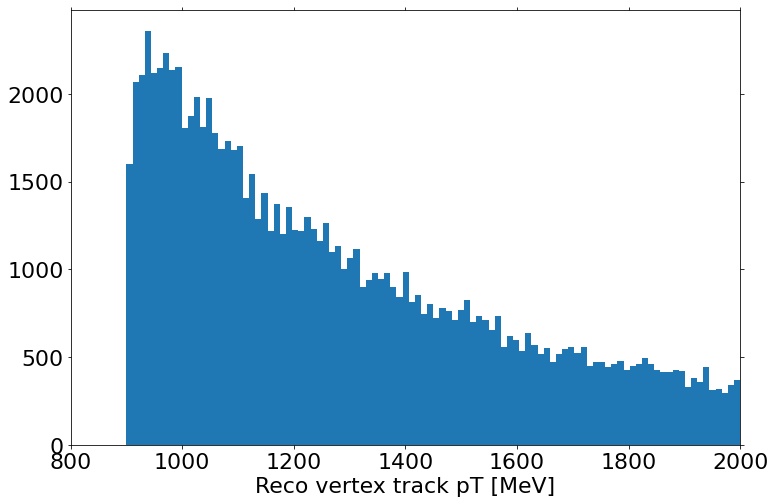

In [57]:
_ = plt.hist(all_vtx_track_pt, bins=100)

plt.xlim(800, 2000)
plt.xlabel('Reco vertex track pT [MeV]')

In [84]:
all_vtx_track_z0 = np.array([])

max_z0 = 1000

for event_track_z0, event_vtx_track_idxs in zip(track_z0[:1000], reco_vertex_track_idxs[:1000]):
    for reco_idxs in event_vtx_track_idxs:
        clean_z0 = event_track_z0[reco_idxs]
        clean_z0 = clean_z0[np.abs(clean_z0) < max_z0]
        
        all_vtx_track_z0 = np.concatenate((all_vtx_track_z0, clean_z0))

In [86]:
track_z0.shape

(6933,)

Text(0.5, 0, 'Reco vertex track z0 [mm]')

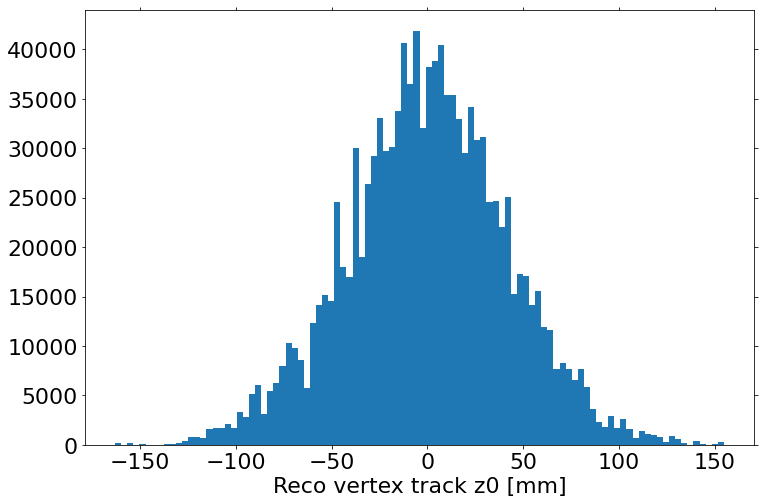

In [88]:
_ = plt.hist(all_vtx_track_z0, bins=100)

plt.xlabel('Reco vertex track z0 [mm]')